In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [28]:
housing = pd.read_csv("dataset/housing.csv")

# Structure of the data:

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Only **ocean_proximity** is a categorical variable (type: object). Later, we can use LabelEncoder to transform it into numeric values.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

As we see, groups are not equal. We can connect the ones with similar categories (for example: near ocean, near bay, island can be connected to a group called 'near water') or/and use OneHotEncoder, so it can be easier to ML algorithms to process as binary values.

In [6]:
housing.describe(exclude=[np.number])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Checking if there are any null values:

In [7]:
# def get_null_count(housing):
#     for i in housing.columns:
#         print(i,': ',len(housing[housing[i].isnull()][i]))
# get_null_count(housing)
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#pd.set_option('display.max_rows', None) #option to see all the lines with null values
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


These null values will be later dealt with, using Imputer that will replace all nulls of every attribute by its median.

# Statistics and plots

In [9]:
housing.describe().applymap(lambda x: f"{x:0.2f}")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


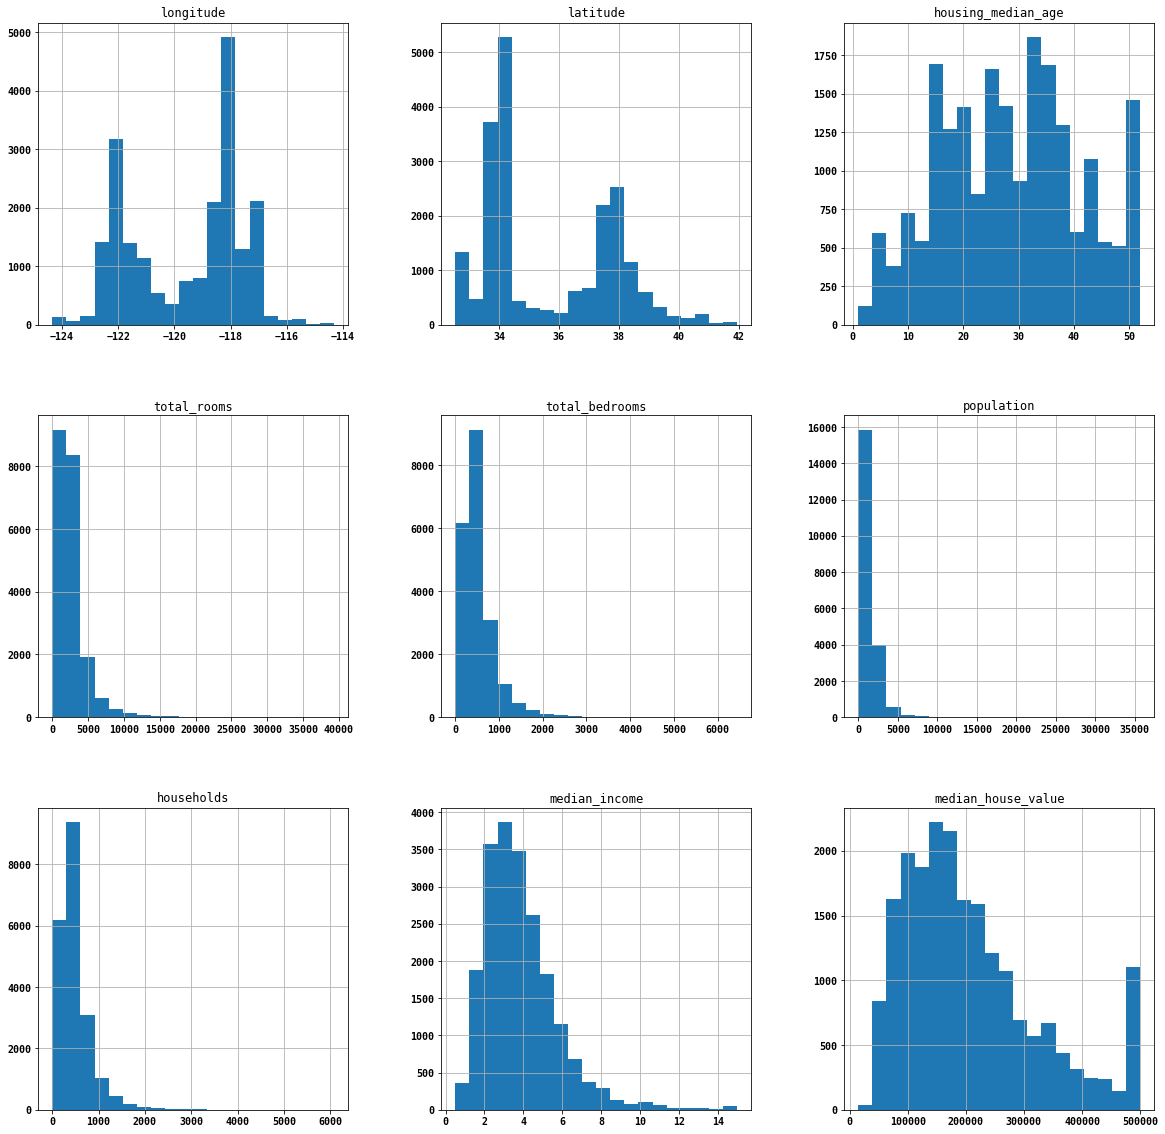

In [10]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '12'}
plt.rc('font', **font) 
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=20, figsize = (20,20))
plt.show()

Most of the features are heavy-tailed. <br>
housing_median_age and median_housing_values were restricted at the end. The second attribute is important for us, as it's our target attribute.

split trzeba zrobić później , najpierw remove outliers, 

# EDA

In [11]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_population = scaler.fit_transform(housing1[["population"]])
#housing1["Scaled_population"] = scaled_population
#housing.plot(kind = "scatter", x = "longitude", y="latitude", alpha = 0.05)

In [12]:
# plt.figure(figsize=(10,6))
# plt.scatter(x=housing1['longitude'],y=housing1['latitude'], alpha=0.1)
# plt.title("Distribution of houses")

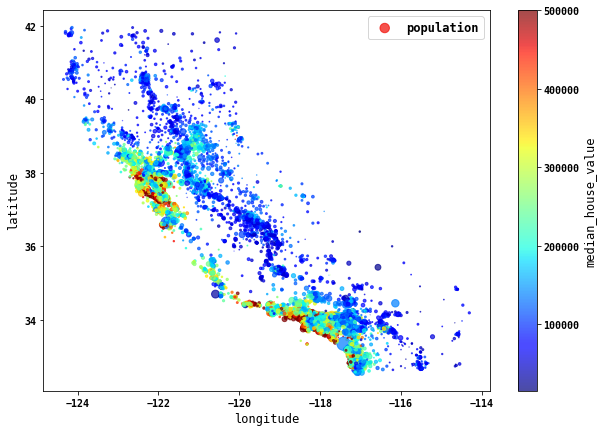

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7,
    s=housing["population"]/200, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

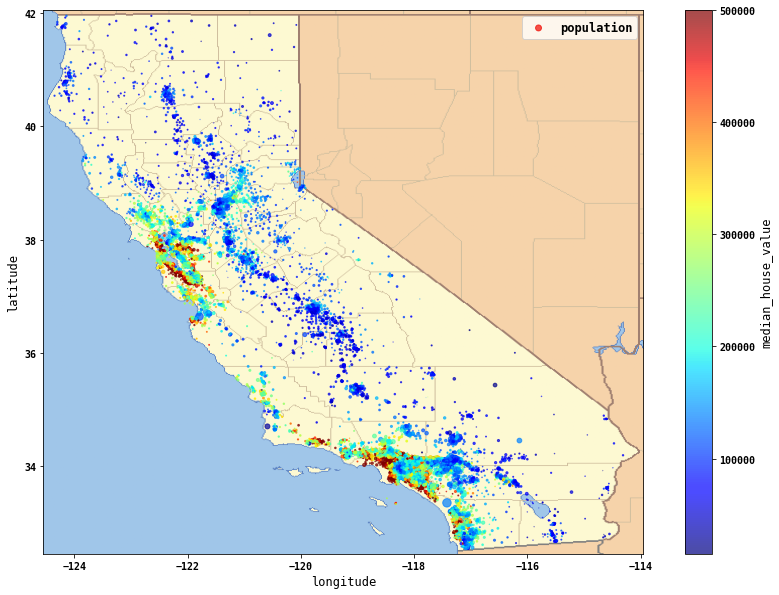

In [14]:
filename = "images/california.png"
california_img = plt.imread(filename)

housing.plot(
             kind="scatter", x="longitude", y="latitude", alpha=0.7,
             s=housing["population"]/500, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(15,10))

axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

From image above, we can infer that: <br>

 - higher prices are related to location and population density 
 - higher house prices are on the coast of California (exception is on the north)
 - we can locate the biggest cities of this state (Sacramento, SF, LA)
 

Correlation

In [15]:
correlation = housing.corr()

In [16]:
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
correlation['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The Pearson correlation coefficient shows pretty strong correlation between <b>median house value</b> and <b>median income</b>. Other values are not that big, so they shouldn't be taken in consideration.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

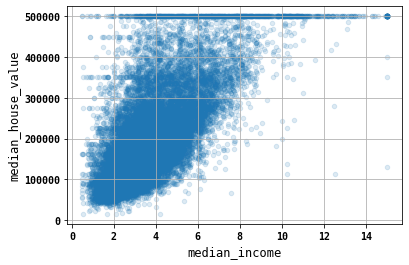

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.15, grid = True)

As we see, correlation between these two attributes is strong. We see linear upward trend. What's interesting is a horizontal line on y = 500000, 450000 and 350000. Maybe data is imposed, and it should be considered to delete it so the performance of the model isn't badly influenced.

Encode categorical data

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
housing['ocean_proximity'] = le.fit_transform(housing['ocean_proximity'])

Dealing with nulls

In [35]:
null_rows_idx = housing.isnull().any(axis=1)
#housing[null_rows_idx] #these were already shown earlier

In [36]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy = 'median')

housing_numerical = housing.select_dtypes(include=[np.number])

imp_median.fit(housing_numerical)

SimpleImputer(strategy='median')

In [37]:
imp_median.statistics_ #median calculated for all the attributes 
#housing_numerical.median().values # the same values 

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  1.0000e+00])

In [38]:
X = imp_median.transform(housing_numerical)

In [39]:
imp_median.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [40]:
housing_transformed = pd.DataFrame(X, columns = housing_numerical.columns, index = housing_numerical.index)

In [41]:
housing_transformed[null_rows_idx]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,0.0
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,1.0
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,4.0
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,1.0
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,1.0
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,435.0,1417.0,302.0,2.3333,92100.0,0.0
19952,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,4.0
20088,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478,138800.0,1.0
20325,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,0.0


Removing outliers

In [44]:
housing_transformed.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [46]:
import seaborn as sns

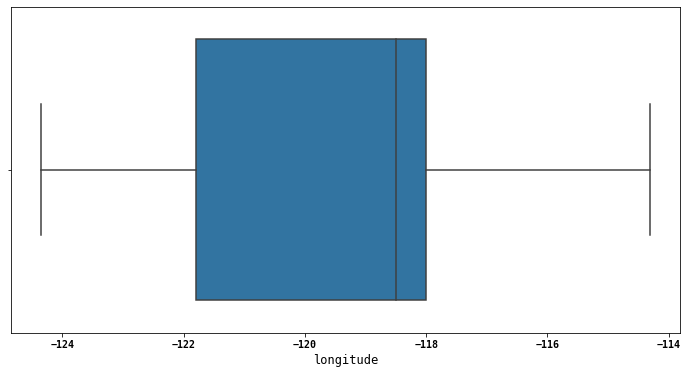

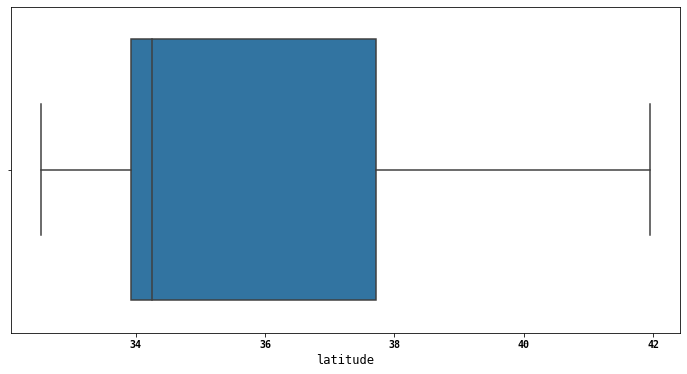

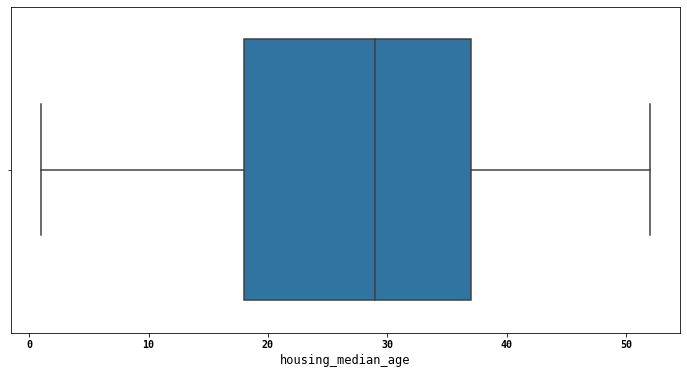

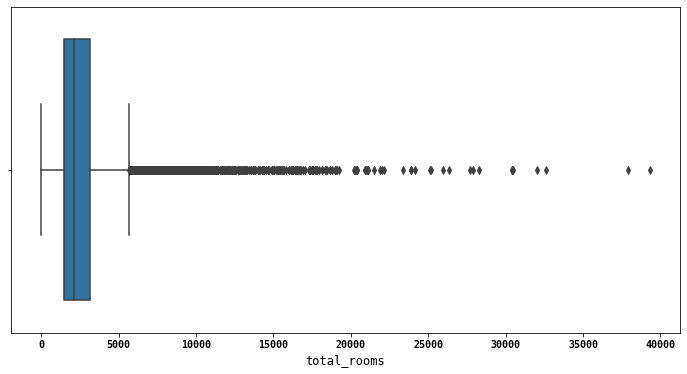

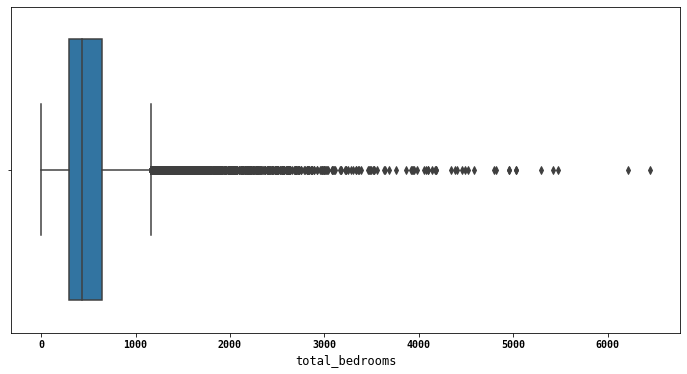

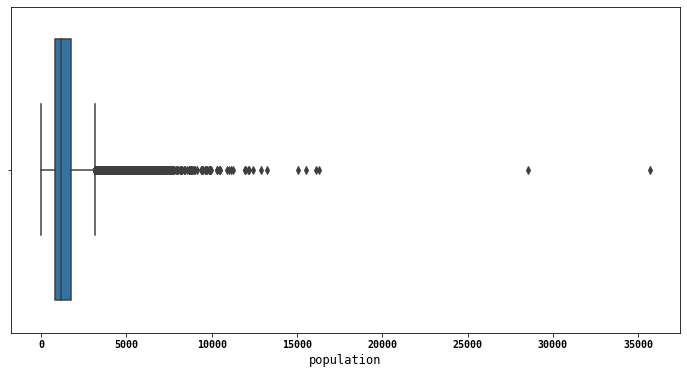

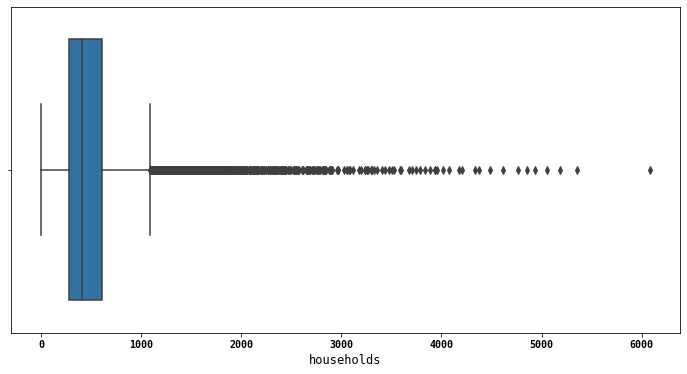

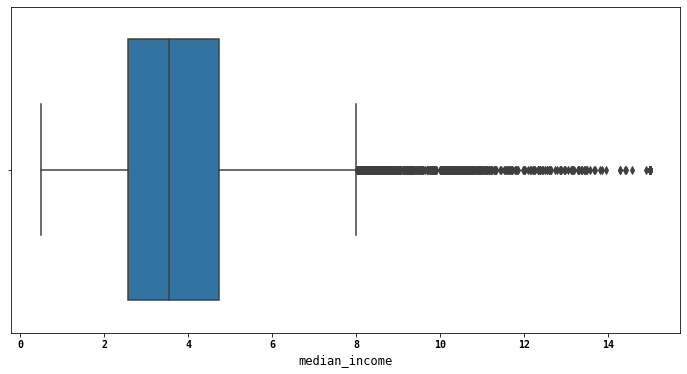

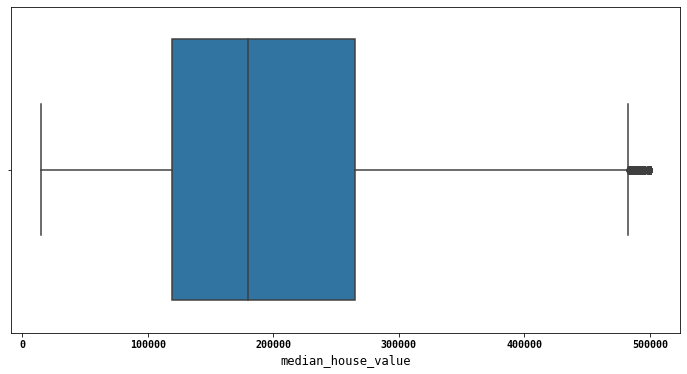

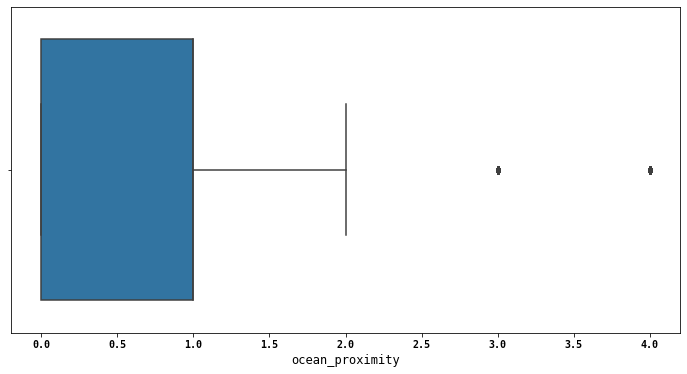

In [47]:
for i in housing_transformed.columns:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=housing_transformed,ax=ax)

We will remove outliers from data:

In [48]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

Isolation Forest is an algorithm for data anomaly detection. It returns array with values -1 or 1, where 1 is for inliers, -1 is for outliers.

In [49]:
outlier_pred

array([-1, -1,  1, ...,  1,  1,  1])

In [50]:
housing_transformed = housing_transformed.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

Housing_transformed is being indexed using the condition [outlier_pred == 1], where only rows with values 1 will be retained.

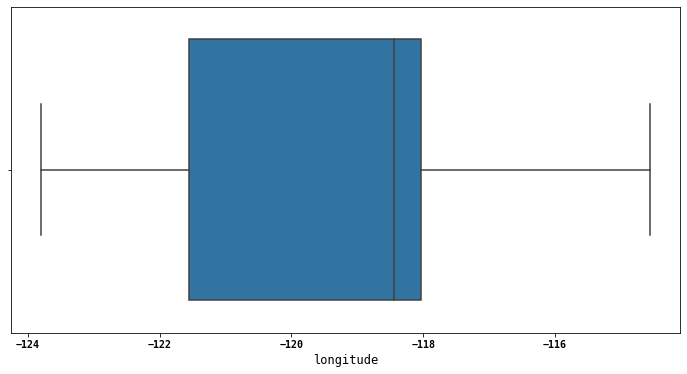

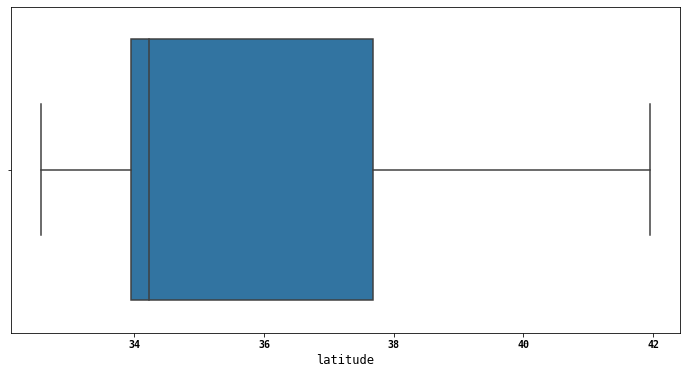

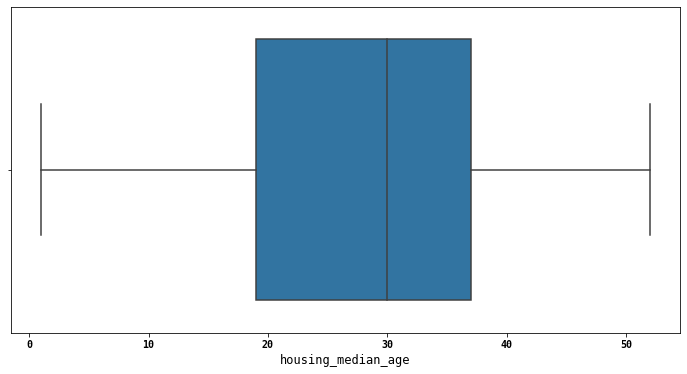

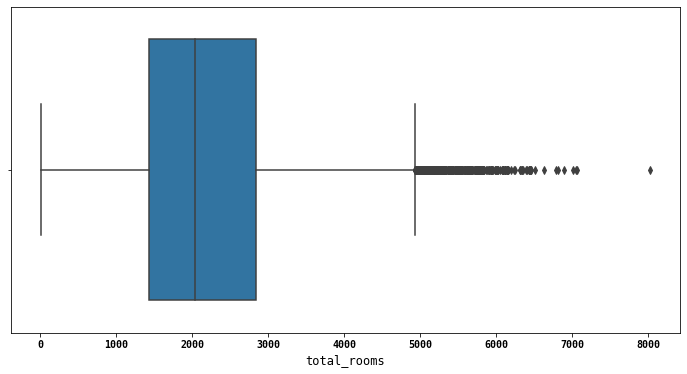

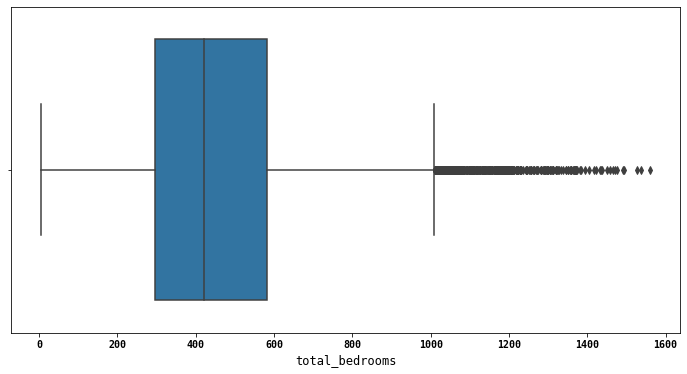

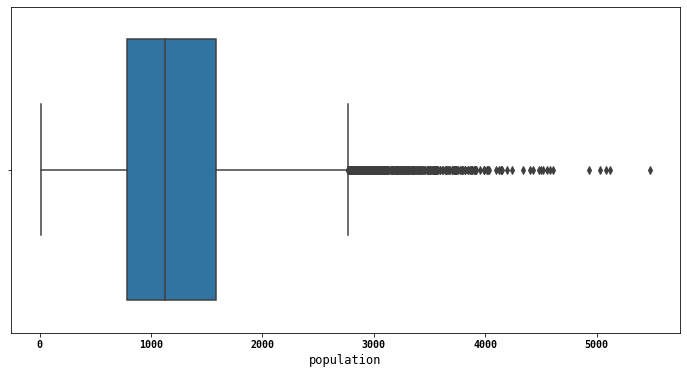

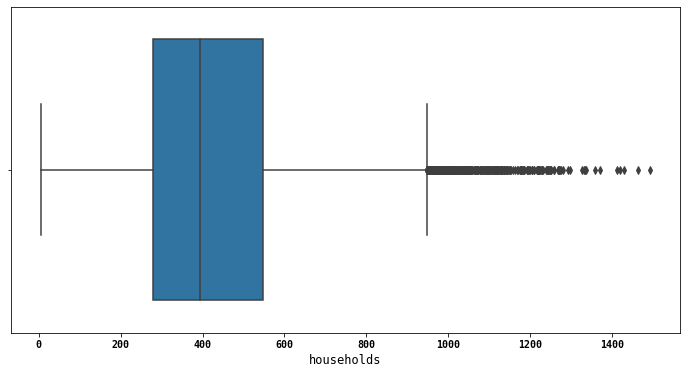

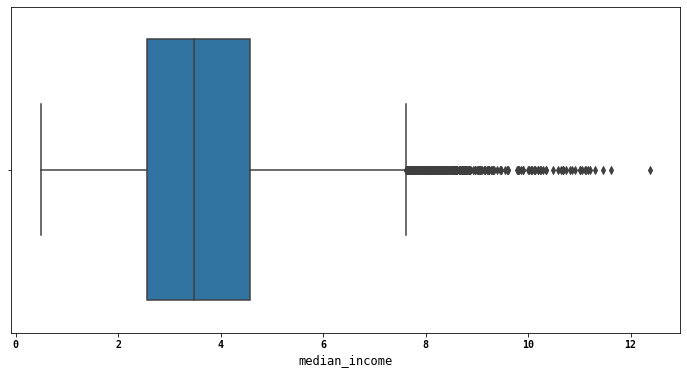

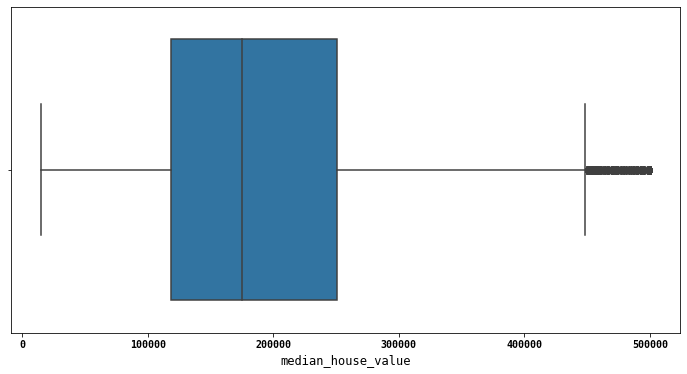

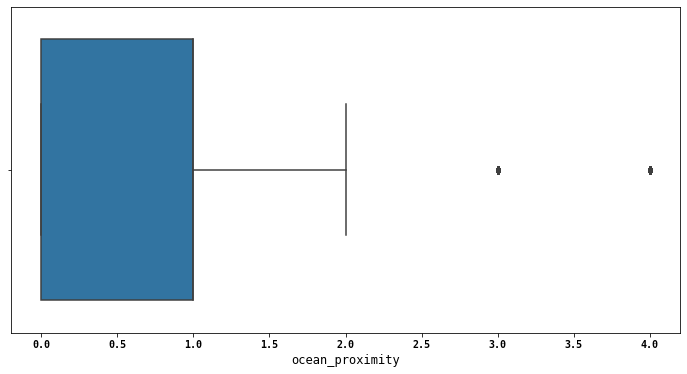

In [54]:
for i in housing_transformed.columns:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=housing_transformed,ax=ax)

Standarization of data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

column_names = housing_transformed.columns

housing_transformed = scaler.fit_transform(housing_transformed)
housing_transformed = pd.DataFrame(housing_transformed, columns = column_names)

In [59]:
housing_transformed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.423355,1.099695,1.877746,-0.687098,-1.190477,-1.169399,-1.206084,2.295025,1.485069,1.445396
1,-1.428557,1.099695,1.877746,-0.863651,-0.992022,-1.072261,-1.006611,1.254842,1.381437,1.445396
2,-1.428557,1.099695,1.877746,-0.540732,-0.793566,-1.061294,-0.816636,0.096999,1.390073,1.445396
3,-1.428557,1.099695,1.877746,-1.188400,-1.089044,-1.299438,-1.130094,0.219813,0.694397,1.445396
4,-1.428557,1.094864,1.877746,0.289893,0.128150,-0.232487,0.394454,-0.023560,0.977465,1.445396
...,...,...,...,...,...,...,...,...,...,...
17640,-0.825119,1.887222,-0.369236,-0.505970,-0.379014,-0.622606,-0.479430,-1.375934,-1.144107,-0.039900
17641,-0.887544,1.892054,-0.951787,-1.391483,-1.366882,-1.388743,-1.505294,-0.733833,-1.153703,-0.039900
17642,-0.892746,1.863065,-1.035008,0.032838,0.110509,-0.368794,0.009755,-1.285917,-1.007851,-0.039900
17643,-0.944766,1.863065,-0.951787,-0.327587,-0.224660,-0.785547,-0.389192,-1.178181,-1.080777,-0.039900


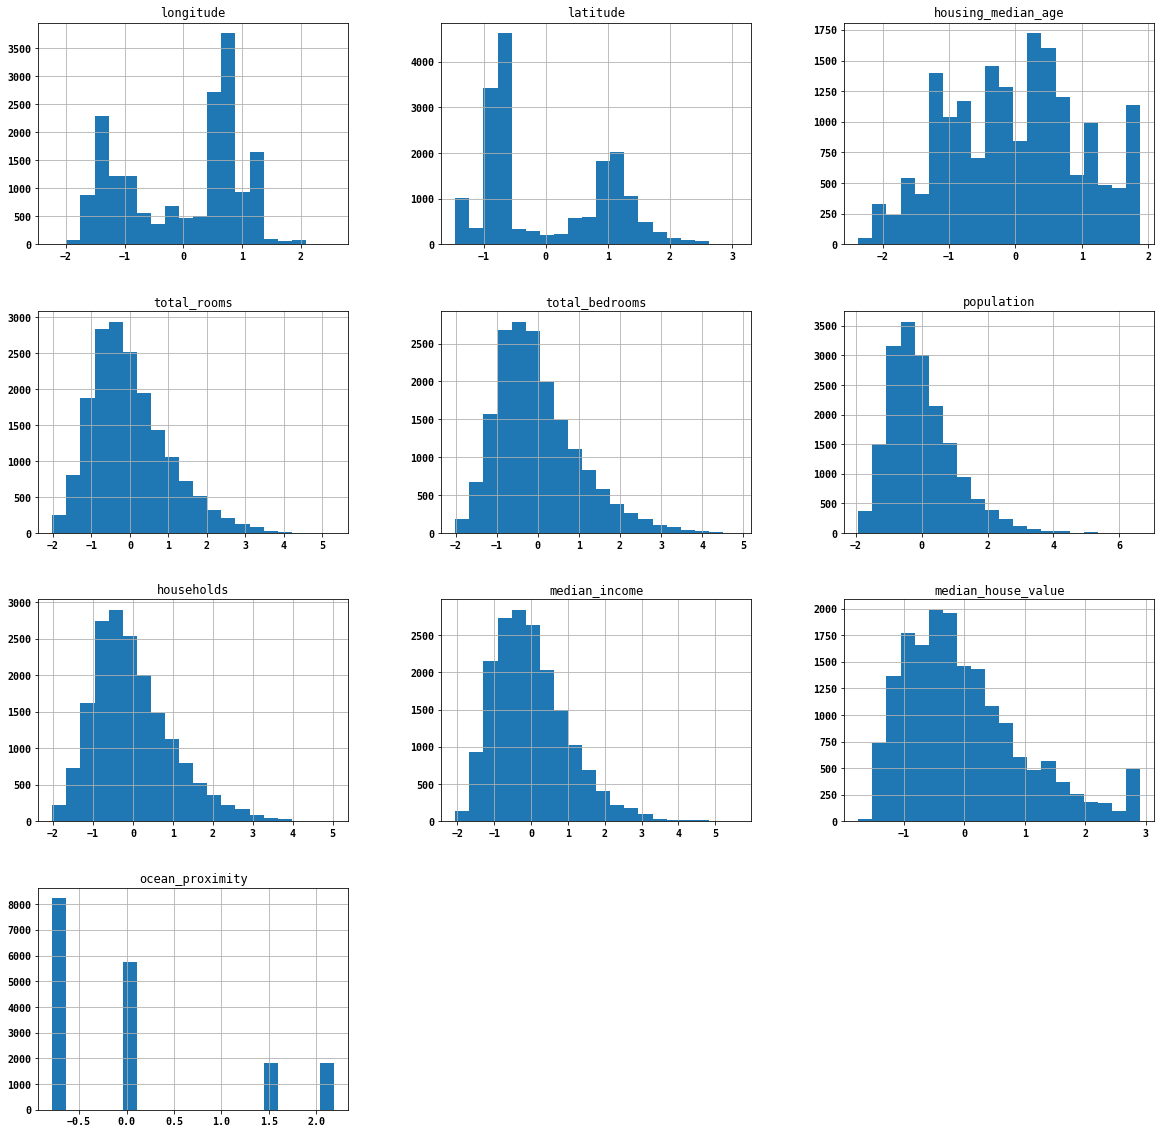

In [61]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : '12'}
plt.rc('font', **font) 
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_transformed.hist(bins=20, figsize = (20,20))
plt.show()

# Creating test and training sets

Split the data into 80% training and 20% test

In [66]:
from sklearn.model_selection import train_test_split

In [62]:
X_Features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
               'total_bedrooms', 'population', 'households', 'median_income',
               'ocean_proximity']
X = housing_transformed[X_Features]
Y = housing_transformed['median_house_value']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(14116, 9) (14116,)
(3529, 9) (3529,)


In [69]:
x_train.to_csv("dataset/x_train.csv",index=False)
x_test.to_csv("dataset/x_test.csv",index=False)
y_train.to_csv("dataset/y_train.csv",index=False)
y_test.to_csv("dataset/y_test.csv",index=False)